In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('sappelli_data\sappelli_data.csv', sep=';')
data.head()

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\alexi\AppData\Local\Temp\ipykernel_8828\1124518863.py:5: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('sappelli_data\sappelli_data.csv', sep=';')


,mid,Act1A1,Act1A2,Act2A1,Act2A2,ReasA1,ReasA2,REA1,REA2,NumTA1,...,T3TyA1,T3TyA2,T3SubjA1,T3SubjA2,sender,date,message_id,subject,body,folder
0,103944,greet,greet,{},{},personal,personal,accountable non-answer,ignore,0,...,NaN,NaN,{},{},tana.jones@enron.com,2000-10-10,<13973474.1075847200439.JavaMail.evans@thyme>,Re: HOTDOG !This is sooo adorable!,It was cute!\tGenia FitzGerald\t10/10/2000 03:...,Tanya_Jones_Dec2000Notes FoldersSent
1,33081,deliver,request,{},{},administrative procedure,internal collaboration,accountable non-answer,postponed reply,1,...,NaN,NaN,{},{},richard.b.sanders@enron.com,2001-02-28,<7857698.1075853272620.JavaMail.evans@thyme>,Re: HEOF,"Frankly, I don t remember it. Ask Linda.\tAndr...",Richard_Sanders_Oct2001Notes FoldersSent
2,103941,deliver,deliver,{},propose,personal,personal,accountable non-answer,ignore,0,...,NaN,NaN,{},{},tana.jones@enron.com,2000-10-10,<10528202.1075847200508.JavaMail.evans@thyme>,Re: HOTDOG !This is sooo adorable!,"It s really all Genia s fault, she goes to lun...",Tanya_Jones_Dec2000Notes FoldersSent
3,103860,deliver,remind,{},{},administrative procedure,legal procedure,immediate reply,immediate reply,1,...,NaN,NaN,{},{},tana.jones@enron.com,2000-10-18,<23700686.1075847202393.JavaMail.evans@thyme>,Re: EnronOnline LLC and Enron North America Corp.,JustinI ve been running around trying to deter...,Tanya_Jones_Dec2000Notes FoldersSent
4,321253,commit,deliver,{},{},employment arrangements,personal,postponed reply,ignore,1,...,NaN,NaN,{},{},j.kaminski@enron.com,2001-07-23,<30497387.1075863431760.JavaMail.evans@thyme>,RE: Christian,"Paul, I hope you feel better. I have seen the ...","VKAMINS (Non-Privileged)Kaminski, Vince JSent ..."


In [11]:
# Keep only body, Act1A1 and Act1A2 columns

act1 = data[['Act1A1','Act1A2', 'body']]
act1.head()

,Act1A1,Act1A2,body
0,greet,greet,It was cute!\tGenia FitzGerald\t10/10/2000 03:...
1,deliver,request,"Frankly, I don t remember it. Ask Linda.\tAndr..."
2,deliver,deliver,"It s really all Genia s fault, she goes to lun..."
3,deliver,remind,JustinI ve been running around trying to deter...
4,commit,deliver,"Paul, I hope you feel better. I have seen the ..."


In [12]:
act1.describe()

,Act1A1,Act1A2,body
count,1144,1144,1144
unique,9,9,1063
top,deliver,deliver,We have received an executed Fourth Amendment ...
freq,498,477,6


In [13]:
# only keep rows where NumTA1 and NumTA2 have the same value

act1 = act1[act1['Act1A1'] == act1['Act1A2']]
act1 = act1.drop(['Act1A2'], axis=1)
act1 = act1.rename(columns={'Act1A1': 'Act1'})
act1.describe()


,Act1,body
count,572,572
unique,9,548
top,deliver,We have received an executed Second Amendment ...
freq,297,4


In [ ]:
# only keep rows where NumTA1 and NumTA2 have the same value

act1 = act1[act1['Act1A1'] == act1['Act1A2']]
act1 = act1.drop(['Act1A2'], axis=1)
act1 = act1.rename(columns={'Act1A1': 'Act1'})
act1.describe()


,Act1,body
count,572,572
unique,9,548
top,deliver,We have received an executed Second Amendment ...
freq,297,4


In [14]:
# remove rows with values not in request, propose, commit, deliver, amend, refuse, greet, remind

act1 = act1[act1['Act1'].isin(['request', 'propose', 'commit', 'deliver', 'amend', 'refuse', 'greet', 'remind'])]
act1.describe()

,Act1,body
count,570,570
unique,8,546
top,deliver,We have received an executed Second Amendment ...
freq,297,4


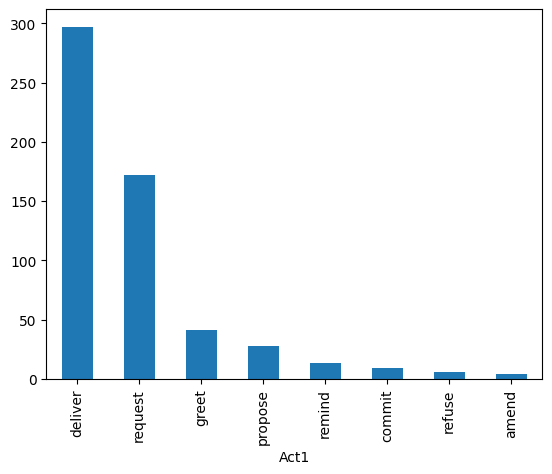

In [15]:
# plot histogram of NumTA1

act1['Act1'].value_counts().plot(kind='bar')
plt.show()

In [16]:
# save to csv

act1.to_csv('sappelli_data\sappelli_data_act1.csv', index=False)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\alexi\AppData\Local\Temp\ipykernel_8828\166016584.py:3: SyntaxWarning: invalid escape sequence '\s'
  act1.to_csv('sappelli_data\sappelli_data_act1.csv', index=False)
